## Homework14-0425
   **截止日期：**<font color=ff0000>**5.3(周二)晚** </font>
   <br>**注：**本次作业中附加题最多加1分。

## 1 时间序列分析基础
GDP.xls中提供了中国12年至今的分季度GDP，本次作业将在其基础上实现（只需任选其一）。

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

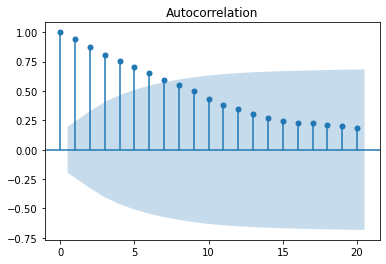

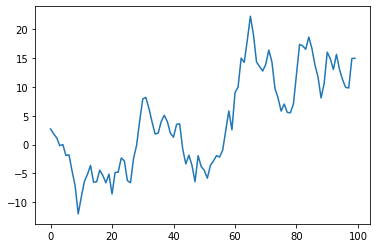

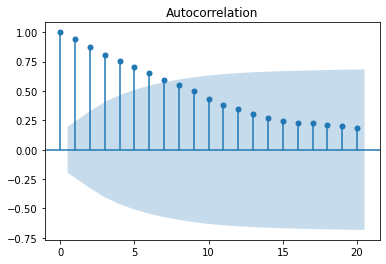

In [5]:
seed=3.14
lagged=np.zeros(100)
for t in range(100):
    lagged[t]=seed + np.random.normal(0,2.5,size=1)
    seed=lagged[t]
plt.plot(lagged)
plot_acf(lagged)

In [19]:
df=pd.read_excel('GDP.xls')
df.head()

,季度,统计时间,国内生产总值（亿元）,第一产业增加值（亿元）,第二产业增加值（亿元）,第三产业增加值（亿元）
0,1,2012第1季度,117357.6,6446.0,52316.2,58595.5
1,2,2012第2季度,131320.7,9911.3,61433.2,59976.1
2,3,2012第3季度,138089.6,14656.1,62256.2,61177.4
3,4,2012第4季度,151812.1,18071.2,68633.5,65107.2
4,5,2013第1季度,129449.6,6869.1,55861.2,66719.3


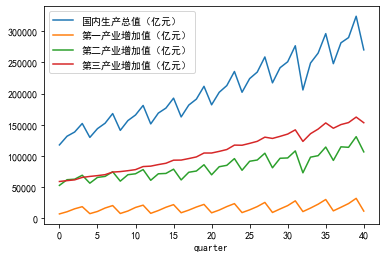

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df.iloc[:,2:6].plot()
plt.xlabel('quarter')
plt.show()

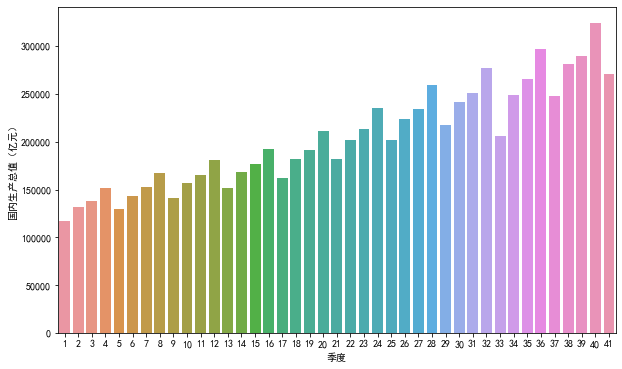

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='季度',y='国内生产总值（亿元）',data=df)
plt.show()

### 1.1 自相关图与ADF计算（2分）
在以上的数据中任选其一完成下面的作业。使用plot_acf()绘制自相关系数图，并计算数据的ADF，判断其是否平稳（pvalue<0.05）。

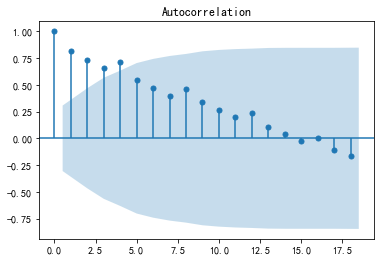

<Figure size 720x432 with 0 Axes>

In [22]:
#TODO
data=df.iloc[:,2]
plot_acf(data,lags=18)
plt.figure(figsize=(10,6))
plt.show()

In [25]:
adfuller(data)[1]<0.05

False

### 1.2 滑动窗口均值与标准差（2分）
选定一个滑动窗口大小（如2），在滑动窗口内计算均值与标准差，并绘制图像。

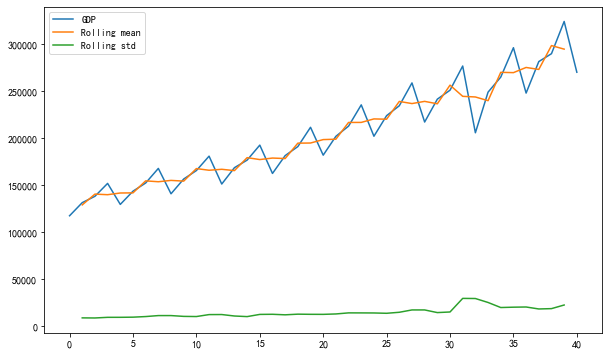

In [7]:
#TODO
ar=data.values
idx=data.index
k=len(ar)
meanar=np.zeros(k)
stdar=np.zeros(k)
for i in range(1,k-1):
    meanar[i]=np.mean(ar[i-1:i+2])
    stdar[i]=np.std(ar[i-1:i+2])
plt.figure(figsize=(10,6))
plt.plot(idx,ar)
plt.plot(idx[1:k-1],meanar[1:k-1])
plt.plot(idx[1:k-1],stdar[1:k-1])
plt.legend(['GDP','Rolling mean','Rolling std'])

In [8]:
#Std output

### 1.3 成分分解（2分）
对序列进行加法或乘法成分分解，并绘制图像。具体可见https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

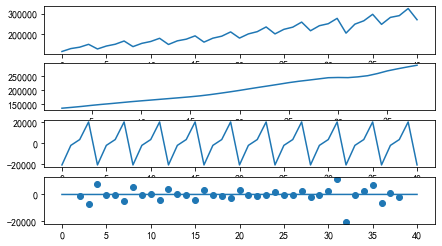

In [9]:
#TODO
estm=seasonal_decompose(x=data,model='additive',period=4)
plt.figure(figsize=(7,4))
plt.subplot(411)
plt.plot(idx,data)
plt.subplot(412)
plt.plot(idx,estm.trend)
plt.subplot(413)
plt.plot(idx,estm.seasonal)
plt.subplot(414)
plt.scatter(idx,estm.resid)
plt.plot(idx,idx)

### 1.4 平稳序列（2分）
对序列迭代地进行差分，直到得到一个平稳序列(p_value<0.05)，绘制最终得到的序列及其自相关图。有能力的同学可以尝试其他方法，可作为加分项。

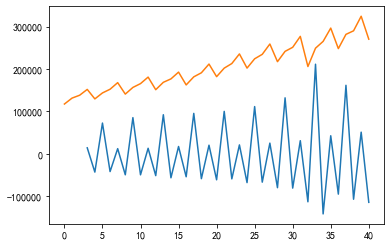

In [10]:
#TODO
k=0
while True:
    if adfuller(ar)[1]<0.05:
        break
    k+=1
    ar=np.diff(ar)
plt.plot(idx[k:],ar)
plt.plot(idx,data.values)

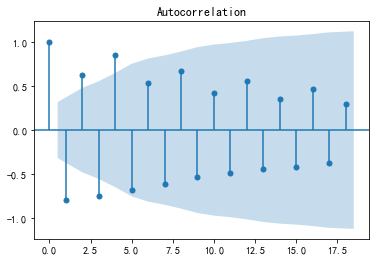

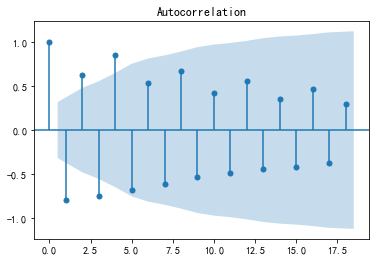

In [11]:
plot_acf(ar,lags=18)#不太清楚为啥出来两个图

In [12]:
#std output

### 1.5 指数滑动平均(EMA)（2分）
与均值滑动平均(Equally Weighted Moving Average) 不同，窗口内的各权值按指数递减，距离越远，权值越小。  

EMA的计算公式为：
$ EMA_t =\left\{
\begin{matrix}
 \alpha y_t + (1-\alpha)EMA_{t-1},t>1\\
 y_1,t=1
\end{matrix}
\right.
$

其中，$\alpha \in (0,1)$表示权重的衰减程度，$\alpha$ 越大，当前抽样值的权重越高，滑动平均的实时性越强，相反，$\alpha$ 越小，平稳性更高。$\alpha$ 实际上控制权重计算中有效项的个数，即指数平滑有效窗口的大小。

绘制 $\alpha$ 取0.7与0.1时的EMA图像。

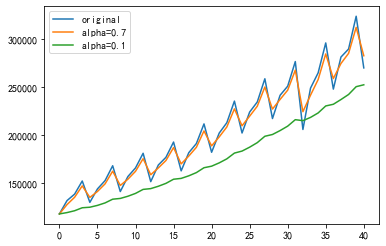

In [13]:
#TODO
ar1=data.values
def EMA(ar1,alpha):
    l=len(ar1)
    ema_ar=np.zeros(l)
    ema_ar[0]=ar1[0]
    for i in range(1,l):
        ema_ar[i]=alpha*ar1[i]+(1-alpha)*ema_ar[i-1]
    return ema_ar

plt.plot(idx,ar1)
plt.plot(idx,EMA(ar1,0.7))
plt.plot(idx,EMA(ar1,0.1))
plt.legend(['original','alpha=0.7','alpha=0.1'])

## 2 附加题（1分）
example.wav中录制了一段鸟鸣声，但背景中存在很大的噪声，希望能编写一段程序去除噪声。这里采用的是librosa库，有关内容可参考其官方文档https://librosa.org/doc/latest/tutorial.html
<br>（1）绘制音频文件example.wav的图像。
<br>（2）去除音频文件中的噪声。（可使用scipy.signal.lfilter）https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
<br>（3）绘制去除噪声后的音频文件图像。

In [14]:
import librosa
import librosa.display
from scipy import signal
from IPython.display import Audio,display

sr = 16000
e_file='example.wav'
y,sr = librosa.load(e_file, mono=True, sr=sr, offset=0, duration=10)

display(Audio(y,rate=sr))

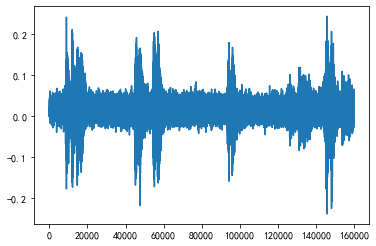

In [15]:
#TODO
plt.plot(y)

In [16]:
b, a = signal.butter(3, 0.95)
noise= signal.lfilter(b,a,y)
plt.plot(w)

NameError: name 'z' is not defined

In [ ]:
display(Audio(w,rate=sr))